# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to HTML, all the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.

---
### Why We're Here

Photo sharing and photo storage services like to have location data for each photo that is uploaded. With the location data, these services can build advanced features, such as automatic suggestion of relevant tags or automatic photo organization, which help provide a compelling user experience. Although a photo's location can often be obtained by looking at the photo's metadata, many photos uploaded to these services will not have location metadata available. This can happen when, for example, the camera capturing the picture does not have GPS or if a photo's metadata is scrubbed due to privacy concerns.

If no location metadata for an image is available, one way to infer the location is to detect and classify a discernable landmark in the image. Given the large number of landmarks across the world and the immense volume of images that are uploaded to photo sharing services, using human judgement to classify these landmarks would not be feasible.

In this notebook, you will take the first steps towards addressing this problem by building models to automatically predict the location of the image based on any landmarks depicted in the image. At the end of this project, your code will accept any user-supplied image as input and suggest the top k most relevant landmarks from 50 possible landmarks from across the world. The image below displays a potential sample output of your finished project.

![Sample landmark classification output](images/sample_landmark_output.png)


### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Download Datasets and Install Python Modules
* [Step 1](#step1): Create a CNN to Classify Landmarks (from Scratch)
* [Step 2](#step2): Create a CNN to Classify Landmarks (using Transfer Learning)
* [Step 3](#step3): Write Your Landmark Prediction Algorithm

---
<a id='step0'></a>
## Step 0: Download Datasets and Install Python Modules

**Note: if you are using the Udacity workspace, *YOU CAN SKIP THIS STEP*. The dataset can be found in the `/data` folder and all required Python modules have been installed in the workspace.**

Download the [landmark dataset](https://udacity-dlnfd.s3-us-west-1.amazonaws.com/datasets/landmark_images.zip).
Unzip the folder and place it in this project's home directory, at the location `/landmark_images`.

Install the following Python modules:
* cv2
* matplotlib
* numpy
* PIL
* torch
* torchvision

---

<a id='step1'></a>
## Step 1: Create a CNN to Classify Landmarks (from Scratch)

In this step, you will create a CNN that classifies landmarks.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 20%.

Although 20% may seem low at first glance, it seems more reasonable after realizing how difficult of a problem this is. Many times, an image that is taken at a landmark captures a fairly mundane image of an animal or plant, like in the following picture.

<img src="images/084c2aa50d0a9249.jpg" alt="Bird in Haleakalā National Park" style="width: 400px;"/>

Just by looking at that image alone, would you have been able to guess that it was taken at the Haleakalā National Park in Hawaii?

An accuracy of 20% is significantly better than random guessing, which would provide an accuracy of just 2%. In Step 2 of this notebook, you will have the opportunity to greatly improve accuracy by using transfer learning to create a CNN.

Remember that practice is far ahead of theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

**Note**: Remember that the dataset can be found at `/data/landmark_images/` in the workspace.

All three of your data loaders should be accessible via a dictionary named `loaders_scratch`. Your train data loader should be at `loaders_scratch['train']`, your validation data loader should be at `loaders_scratch['valid']`, and your test data loader should be at `loaders_scratch['test']`.

You may find [this documentation on custom datasets](https://pytorch.org/docs/stable/torchvision/datasets.html#datasetfolder) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [1]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
import os
import numpy as np
import torch

from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

In [2]:
num_workers= 0
# samples per batch to load
batch_size = 32
# validation set percentage
valid_ratio = 0.2

# Set Transform
# Crop
# Normalize(mean=0.5,std=0.5)
data_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# dataset
train_data = datasets.ImageFolder('/data/landmark_images/train/', transform=data_transform)
test_data = datasets.ImageFolder('/data/landmark_images/test/', transform=data_transform)

print(len(train_data))
print(len(test_data))

# split random index into train set and validation set
train_num = len(train_data)
indices = list(range(train_num))
np.random.shuffle(indices)
split = int(np.floor(valid_ratio * train_num))
train_idx, valid_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, sampler=train_sampler)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, sampler=valid_sampler)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

# All three of your data loaders should be accessible via a dictionary
loaders_scratch = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

print('train set:',len(loaders_scratch['train']))
print('validation set:',len(loaders_scratch['valid']))
print('test set:',len(loaders_scratch['test']))

4996
1250
train set: 125
validation set: 32
test set: 40


**Question 1:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

**Answer**: I randomly cropped Image data 224 x 224 (vgg16 network input size) and normalized it. I did not augment any images.

### (IMPLEMENTATION) Visualize a Batch of Training Data

Use the code cell below to retrieve a batch of images from your train data loader, display at least 5 images simultaneously, and label each displayed image with its class name (e.g., "Golden Gate Bridge").

Visualizing the output of your data loader is a great way to ensure that your data loading and preprocessing are working as expected.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## TODO: visualize a batch of the train data loader
## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)

In [4]:
def imgshow(image):
    image = (image * 0.5) + 0.5 # unnormalize
    plt.imshow(np.transpose(image, (1,2,0)))

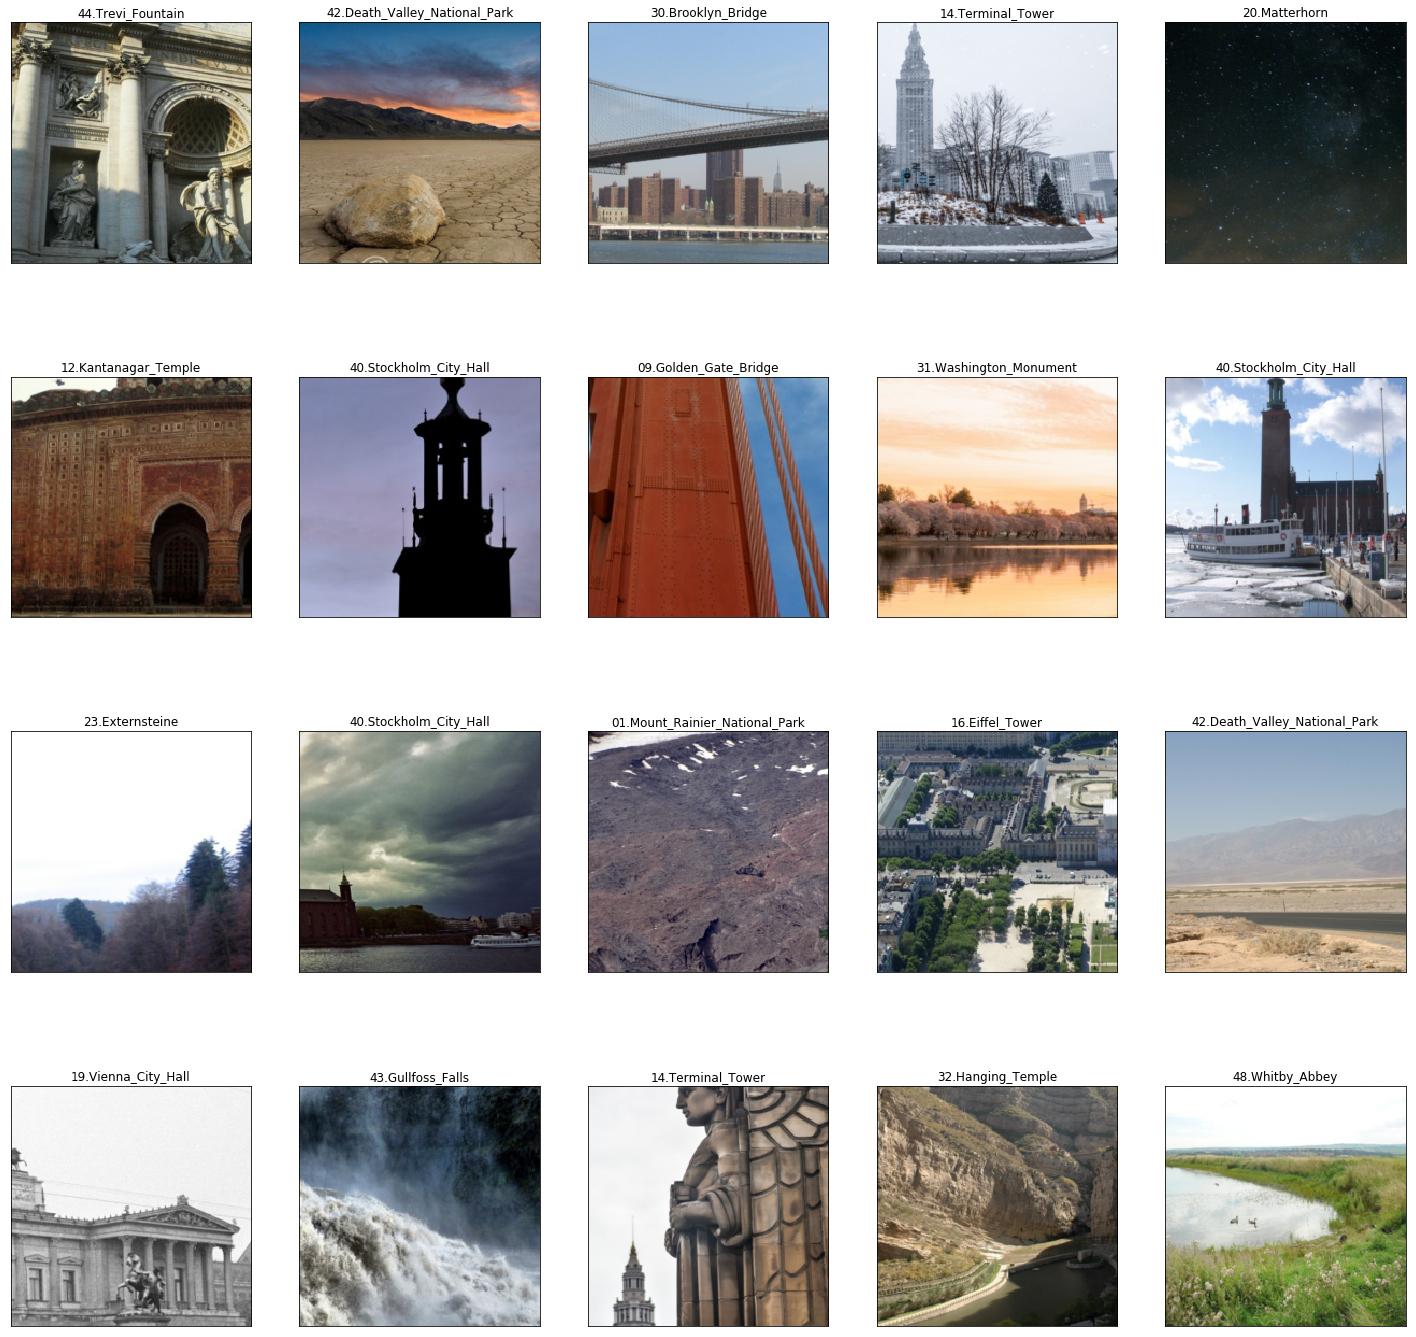

In [5]:
detaiter = iter(loaders_scratch['train'])
images, labels = detaiter.next()
images = images.numpy()

p = plt.figure(figsize=(25,25))

for n in np.arange(20):
    ax = p.add_subplot(4, 5, n+1, xticks=[], yticks=[])
    imgshow(images[n])
    ax.set_title(train_data.classes[labels[n]])

### Initialize use_cuda variable

In [6]:
# useful variable that tells us whether we should use the GPU
use_cuda = torch.cuda.is_available()

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and fill in the function `get_optimizer_scratch` below.

In [7]:
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn

## TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

def get_optimizer_scratch(model):
    # optim.SGD (stochastic gradient descent)
    # optim.Adam
    return optim.Adam(model.parameters(), lr=0.001)

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify images of landmarks.  Use the template in the code cell below.

In [8]:
# define the CNN architecture
class Net(nn.Module):
    ## TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        # convolutional layer
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1)
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # fully connected
        self.fc1 = nn.Linear(14*14*128, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 50)
        self.dropout = nn.Dropout(0.2)
    
    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
         # flatten and dropout
        x = x.view(-1, 14*14*128)
        x = self.dropout(x)
        # 1st hiddn relu activation
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        # 2nd hidden
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        # 3rd hidden
        x = self.fc3(x)
        return x

#-#-# Do NOT modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 2:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__  
I designed 3 convolutional layer with Relu activation function.
Designed forward pass below.

- input image 224 x 224 x 3
- convolutional layer 1 with relu function 224 x 224 x 16
- maxpool with kernel size (2,2) 112 x 112 x 16
- convolutional layer 2 with relu function 112 x 112 x 32
- maxpool with kernel size (2,2) 56 x 56 x 32
- convolutional layer 3 with relu function 56 x 56 x 64
- maxpool with kernel size (2,2) 28 x 28 x 64
- convolutional layer 4 with relu function 28 x 28 x 128
- maxpool with kernel size (2,2) 14 x 14 x 128

After flattening layers to the 1d vector (size=14 x 14 x 128), I used two fully connected layers and relu function in hidden layers.

### (IMPLEMENTATION) Implement the Training Algorithm

Implement your training algorithm in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at the filepath stored in the variable `save_path`.

In [9]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        # set the module to training mode
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: find the loss and update the model parameters accordingly
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward() # calculate gradient
            optimizer.step() # update wieghts
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))

        ######################    
        # validate the model #
        ######################
        # set the model to evaluation mode
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: update average validation loss
            with torch.no_grad():
                output = model(data)
                loss = criterion(output, target)
            valid_loss =valid_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - valid_loss))
        
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))

        ## TODO: if the validation loss has decreased, save the model at the filepath stored in save_path
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss          
        
    torch.cuda.empty_cache()
    return model

### (IMPLEMENTATION) Experiment with the Weight Initialization

Use the code cell below to define a custom weight initialization, and then train with your weight initialization for a few epochs. Make sure that neither the training loss nor validation loss is `nan`.

Later on, you will be able to see how this compares to training with PyTorch's default weight initialization.

In [10]:
def custom_weight_init(m):
    classname = m.__class__.__name__
    ## TODO: implement a weight initialization strategy
    # for every Linear layer, weights should be taken from a normal distribution
    if classname.find('Linear') != -1:
        n = m.in_features
        y = 1.0/np.sqrt(n)
        m.weight.data.normal_(0,y)
        m.bias.data.fill_(0)

In [11]:
#-#-# Do NOT modify the code below this line. #-#-#
    
model_scratch.apply(custom_weight_init)
model_scratch = train(5, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch),
                      criterion_scratch, use_cuda, 'ignore.pt')

Epoch: 1 	Training Loss: 3.910563 	Validation Loss: 3.885770
Validation loss decreased (inf --> 3.885770).  Saving model ...
Epoch: 2 	Training Loss: 3.861406 	Validation Loss: 3.801858
Validation loss decreased (3.885770 --> 3.801858).  Saving model ...
Epoch: 3 	Training Loss: 3.794316 	Validation Loss: 3.754711
Validation loss decreased (3.801858 --> 3.754711).  Saving model ...
Epoch: 4 	Training Loss: 3.713207 	Validation Loss: 3.642133
Validation loss decreased (3.754711 --> 3.642133).  Saving model ...
Epoch: 5 	Training Loss: 3.657134 	Validation Loss: 3.592469
Validation loss decreased (3.642133 --> 3.592469).  Saving model ...


### (IMPLEMENTATION) Train and Validate the Model

Run the next code cell to train your model.

In [12]:
## TODO: you may change the number of epochs if you'd like,
## but changing it is not required
num_epochs = 15

#-#-# Do NOT modify the code below this line. #-#-#

# function to re-initialize a model with pytorch's default weight initialization
def default_weight_init(m):
    reset_parameters = getattr(m, 'reset_parameters', None)
    if callable(reset_parameters):
        m.reset_parameters()

# reset the model parameters
model_scratch.apply(default_weight_init)

# train the model
model_scratch = train(num_epochs, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch), 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch: 1 	Training Loss: 3.880545 	Validation Loss: 3.820818
Validation loss decreased (inf --> 3.820818).  Saving model ...
Epoch: 2 	Training Loss: 3.792192 	Validation Loss: 3.771296
Validation loss decreased (3.820818 --> 3.771296).  Saving model ...
Epoch: 3 	Training Loss: 3.758429 	Validation Loss: 3.729305
Validation loss decreased (3.771296 --> 3.729305).  Saving model ...
Epoch: 4 	Training Loss: 3.718763 	Validation Loss: 3.644131
Validation loss decreased (3.729305 --> 3.644131).  Saving model ...
Epoch: 5 	Training Loss: 3.663624 	Validation Loss: 3.613918
Validation loss decreased (3.644131 --> 3.613918).  Saving model ...
Epoch: 6 	Training Loss: 3.625022 	Validation Loss: 3.565665
Validation loss decreased (3.613918 --> 3.565665).  Saving model ...
Epoch: 7 	Training Loss: 3.554724 	Validation Loss: 3.527157
Validation loss decreased (3.565665 --> 3.527157).  Saving model ...
Epoch: 8 	Training Loss: 3.494503 	Validation Loss: 3.485301
Validation loss decreased (3.52715

### (IMPLEMENTATION) Test the Model

Run the code cell below to try out your model on the test dataset of landmark images. Run the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 20%.

In [13]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    # set the module to evaluation mode
    model.eval()

    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))


In [14]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.121446


Test Accuracy: 20% (255/1250)


---
<a id='step2'></a>
## Step 2: Create a CNN to Classify Landmarks (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify landmarks from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

All three of your data loaders should be accessible via a dictionary named `loaders_transfer`. Your train data loader should be at `loaders_transfer['train']`, your validation data loader should be at `loaders_transfer['valid']`, and your test data loader should be at `loaders_transfer['test']`.

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [15]:
import os
import numpy as np
import torch

import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

%matplotlib inline

In [16]:
torch.cuda.empty_cache()

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

num_workers= 0
# samples per batch to load
batch_size = 32
# validation set percentage
valid_ratio = 0.2

# vgg-16 takes 224x224 images
data_transform = transforms.Compose([transforms.RandomResizedCrop(224), 
                                      transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# dataset
train_data = datasets.ImageFolder('/data/landmark_images/train/', transform=data_transform)
test_data = datasets.ImageFolder('/data/landmark_images/test/', transform=data_transform)

print('train data num: ', len(train_data))
print('test data num: ', len(test_data))

# split random index into train set and validation set
train_num = len(train_data)
indices = list(range(train_num))
np.random.shuffle(indices)
split = int(np.floor(valid_ratio * train_num))
train_idx, valid_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, sampler=train_sampler)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, sampler=valid_sampler)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

# All three of your data loaders should be accessible via a dictionary
loaders_transfer = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

print('random train set:',len(loaders_transfer['train']))
print('random validation set:',len(loaders_transfer['valid']))
print('random test set:',len(loaders_transfer['test']))

train data num:  4996
test data num:  1250
random train set: 125
random validation set: 32
random test set: 40


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_transfer`, and fill in the function `get_optimizer_transfer` below.

In [17]:
import torch.optim as optim
import torch.nn as nn
from torchvision import models

criterion_transfer = nn.CrossEntropyLoss()

def get_optimizer_transfer(model):
    ## TODO: select and return optimizer
    return optim.Adam(model.more_classifiers.parameters(), lr=0.001) 

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify images of landmarks.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [18]:
# load vgg16 pretrained model
model_vgg16 = models.vgg16(pretrained=True)

#freezing features- weights
for param in model_vgg16.features.parameters():
    param.require_grad = False
    
print(model_vgg16)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:04<00:00, 111574176.17it/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [19]:
# make transfer learning model based on pretrained vgg16
model_transfer = nn.Sequential()
model_transfer.add_module('vgg16', model_vgg16)
model_transfer.add_module('more_classifiers', 
                          nn.Sequential(nn.ReLU(inplace=True)
                                       ,nn.Dropout(p=0.5)
                                       ,nn.Linear(1000,50)))

print(model_transfer)

#-#-# Do NOT modify the code below this line. #-#-#

if use_cuda:
    model_transfer = model_transfer.cuda()

Sequential(
  (vgg16): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace)
      (16): MaxPool2d(kernel_size=2, stride=

__Question 3:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__  

- vgg16 architectures increase depth with very small kernel size(3x3), which makes depth larger.
- ImageNet challenge dataset shows deep convolutional networks is effective in image classification.
- I earned pretrained vgg-16 network which has the last fully connected layer size 4096 to 1000.
- Problem I have to solve has less classification so I add more classifier layers(fully-connected layers) to get 50 outputs in the end.

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [20]:
# TODO: train the model and save the best model parameters at filepath 'model_transfer.pt'
num_epochs = 20

model_transfer = train(num_epochs, loaders_transfer, model_transfer, get_optimizer_transfer(model_transfer), 
     criterion_transfer, use_cuda, 'model_transfer.pt')

#-#-# Do NOT modify the code below this line. #-#-#

# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 3.134426 	Validation Loss: 2.058654
Validation loss decreased (inf --> 2.058654).  Saving model ...
Epoch: 2 	Training Loss: 2.255764 	Validation Loss: 1.945635
Validation loss decreased (2.058654 --> 1.945635).  Saving model ...
Epoch: 3 	Training Loss: 2.080110 	Validation Loss: 1.754534
Validation loss decreased (1.945635 --> 1.754534).  Saving model ...
Epoch: 4 	Training Loss: 1.999554 	Validation Loss: 1.743559
Validation loss decreased (1.754534 --> 1.743559).  Saving model ...
Epoch: 5 	Training Loss: 1.936771 	Validation Loss: 1.819484
Epoch: 6 	Training Loss: 1.889257 	Validation Loss: 1.764541
Epoch: 7 	Training Loss: 1.888839 	Validation Loss: 1.764321
Epoch: 8 	Training Loss: 1.827071 	Validation Loss: 1.761026
Epoch: 9 	Training Loss: 1.831024 	Validation Loss: 1.674974
Validation loss decreased (1.743559 --> 1.674974).  Saving model ...
Epoch: 10 	Training Loss: 1.818869 	Validation Loss: 1.755022
Epoch: 11 	Training Loss: 1.836681 	Validation Lo

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of landmark images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [21]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.329208


Test Accuracy: 64% (801/1250)


---
<a id='step3'></a>
## Step 3: Write Your Landmark Prediction Algorithm

Great job creating your CNN models! Now that you have put in all the hard work of creating accurate classifiers, let's define some functions to make it easy for others to use your classifiers.

### (IMPLEMENTATION) Write Your Algorithm, Part 1

Implement the function `predict_landmarks`, which accepts a file path to an image and an integer k, and then predicts the **top k most likely landmarks**. You are **required** to use your transfer learned CNN from Step 2 to predict the landmarks.

An example of the expected behavior of `predict_landmarks`:
```
>>> predicted_landmarks = predict_landmarks('example_image.jpg', 3)
>>> print(predicted_landmarks)
['Golden Gate Bridge', 'Brooklyn Bridge', 'Sydney Harbour Bridge']
```

In [22]:
import cv2
from PIL import Image

## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)

def predict_landmarks(img_path, k):
    
    assert k <= 50
    
    ## TODO: return the names of the top k landmarks predicted by the transfer learned CNN
    image_data = Image.open(img_path)
    img_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    
    image_data = img_transform(image_data)
    #print(image_data.shape)
    image_data = torch.unsqueeze(image_data, 0)
    #print(image_data.shape)
    
    # cuda
    if use_cuda:
        image_data = image_data.cuda()
        
    #eval
    model_transfer.eval()
    
    with torch.no_grad():
        output = model_transfer(image_data)
    
    values, indices = output.topk(k)
    top_k_classes = []
    for i in indices[0].tolist():
        class_list = train_loader.dataset.classes[i]
        class_list = str(class_list).split('.')[1].replace('_', ' ')
        top_k_classes.append(class_list)
        
    #train
    model_transfer.train()

    return top_k_classes

# test on a sample image
predict_landmarks('images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg', 5)

['Golden Gate Bridge',
 'Sydney Harbour Bridge',
 'Brooklyn Bridge',
 'Forth Bridge',
 'Eiffel Tower']

### (IMPLEMENTATION) Write Your Algorithm, Part 2

In the code cell below, implement the function `suggest_locations`, which accepts a file path to an image as input, and then displays the image and the **top 3 most likely landmarks** as predicted by `predict_landmarks`.

Some sample output for `suggest_locations` is provided below, but feel free to design your own user experience!
![](images/sample_landmark_output.png)

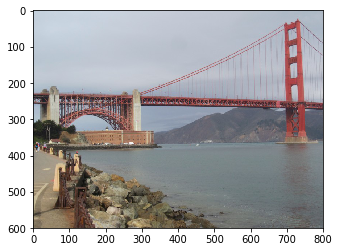

Is this picture of the Golden Gate Bridge , Brooklyn Bridge , or Forth Bridge


In [23]:
def suggest_locations(img_path):
    # get landmark predictions
    predicted_landmarks = predict_landmarks(img_path, 3)
    
    ## TODO: display image and display landmark predictions
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()
    print('Is this picture of the',predicted_landmarks[0],',', predicted_landmarks[1],', or', predicted_landmarks[2])
    
# test on a sample image
suggest_locations('images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg')

### (IMPLEMENTATION) Test Your Algorithm

Test your algorithm by running the `suggest_locations` function on at least four images on your computer. Feel free to use any images you like.

__Question 4:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 
1. I can add more layers to transfer model using vgg16 net.
2. Suggested photo below contains Korean landmarks while training set images is baised. I can add more unbaised landmark images in training set.
3. Normalizing image data with mean=0.5, std=0.5 might be oversimplification. 
There would be better normalizing techniques.

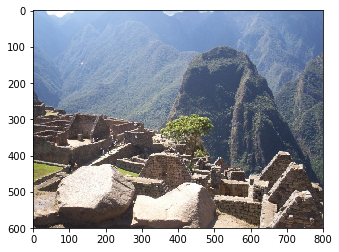

Is this picture of the Great Wall of China , Machu Picchu , or Edinburgh Castle


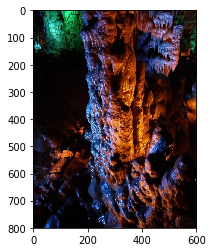

Is this picture of the Soreq Cave , Externsteine , or Kantanagar Temple


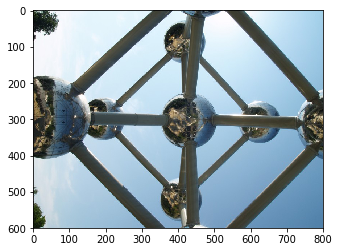

Is this picture of the Atomium , Eiffel Tower , or London Olympic Stadium


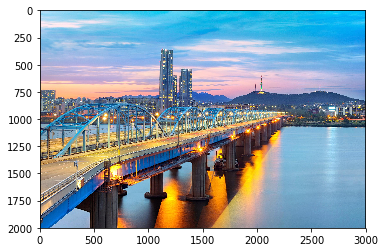

Is this picture of the Sydney Harbour Bridge , Eiffel Tower , or Brooklyn Bridge


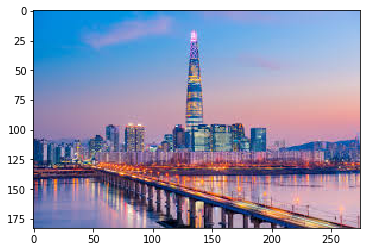

Is this picture of the Stockholm City Hall , Golden Gate Bridge , or Brooklyn Bridge


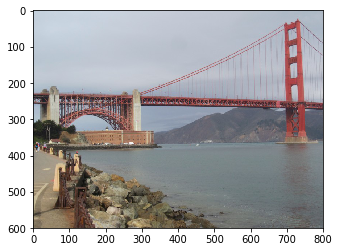

Is this picture of the Sydney Harbour Bridge , Forth Bridge , or Eiffel Tower


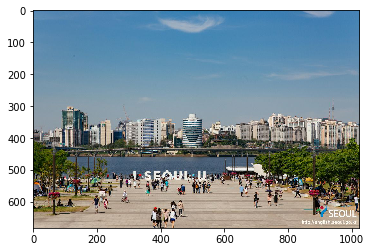

Is this picture of the Moscow Raceway , Stockholm City Hall , or Temple of Olympian Zeus


In [30]:
## TODO: Execute the `suggest_locations` function on
## at least 4 images on your computer.
## Feel free to use as many code cells as needed.
import os

for img_path in os.listdir('images/test'):
    img_path = os.path.join('images/test', img_path)
    if img_path.lower().endswith('.jpg'):
        suggest_locations(img_path)